***Problem Statement***

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

***Business Goal:***

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


                                                                                                                                                                                                                                                                                                      

# Importing all required libraries

In [3]:
import pandas as pd
import numpy as np
import calendar
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Step 1: Reading and Understanding the Data

## Reading the Bike sharing dataset

In [6]:
# Read and view the bike sharing Dataset
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Analysing dataset

In [8]:
# Inspecting the Dataset
bike_df.shape

(730, 16)

In [9]:
# Get to know about type of Data
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Observation :
In the Bike Prediction dataset there are 730 rows and 16 columns in which we are going to use the 'CNT' column for prediction.

## Data Quality Check and Cleaning

In [13]:
# check for missing values if any
# percentage of missing values in each column
round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [14]:
# percentage of missing values in each row
round(100*(bike_df.isnull().sum(axis=1)/len(bike_df)), 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

##### Observation : No missing or null values found in columns as well as rows

In [16]:
# Checking for duplicates and dropping the entire duplicate row if any
bike_df.drop_duplicates(subset=None, inplace=True)
bike_df.shape

(730, 16)

##### Observation : No duplicates found in rows

#### Drop columns that are not useful for analysis
#### 1. instant is just a row instance identifier.
#### 2. dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
#### 3. casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [19]:
bike_df = bike_df.drop(['instant','dteday', 'casual', 'registered'],axis =1)
bike_df.shape

(730, 12)

# Step 2: Visualising the Data


We will do the following here:
- We would be able to see if all the variables are linearly related or not (important if we want to proceed with a linear model)
- Check for the presence of multicollinearity if already exists
- Here we might also see if some predictors have a very direct relationship(correlation) with the outcome variable:
We will create some visualizations of our data using matplotlib and seaborn.

## Visualising Numeric Variables : Using a pairplot


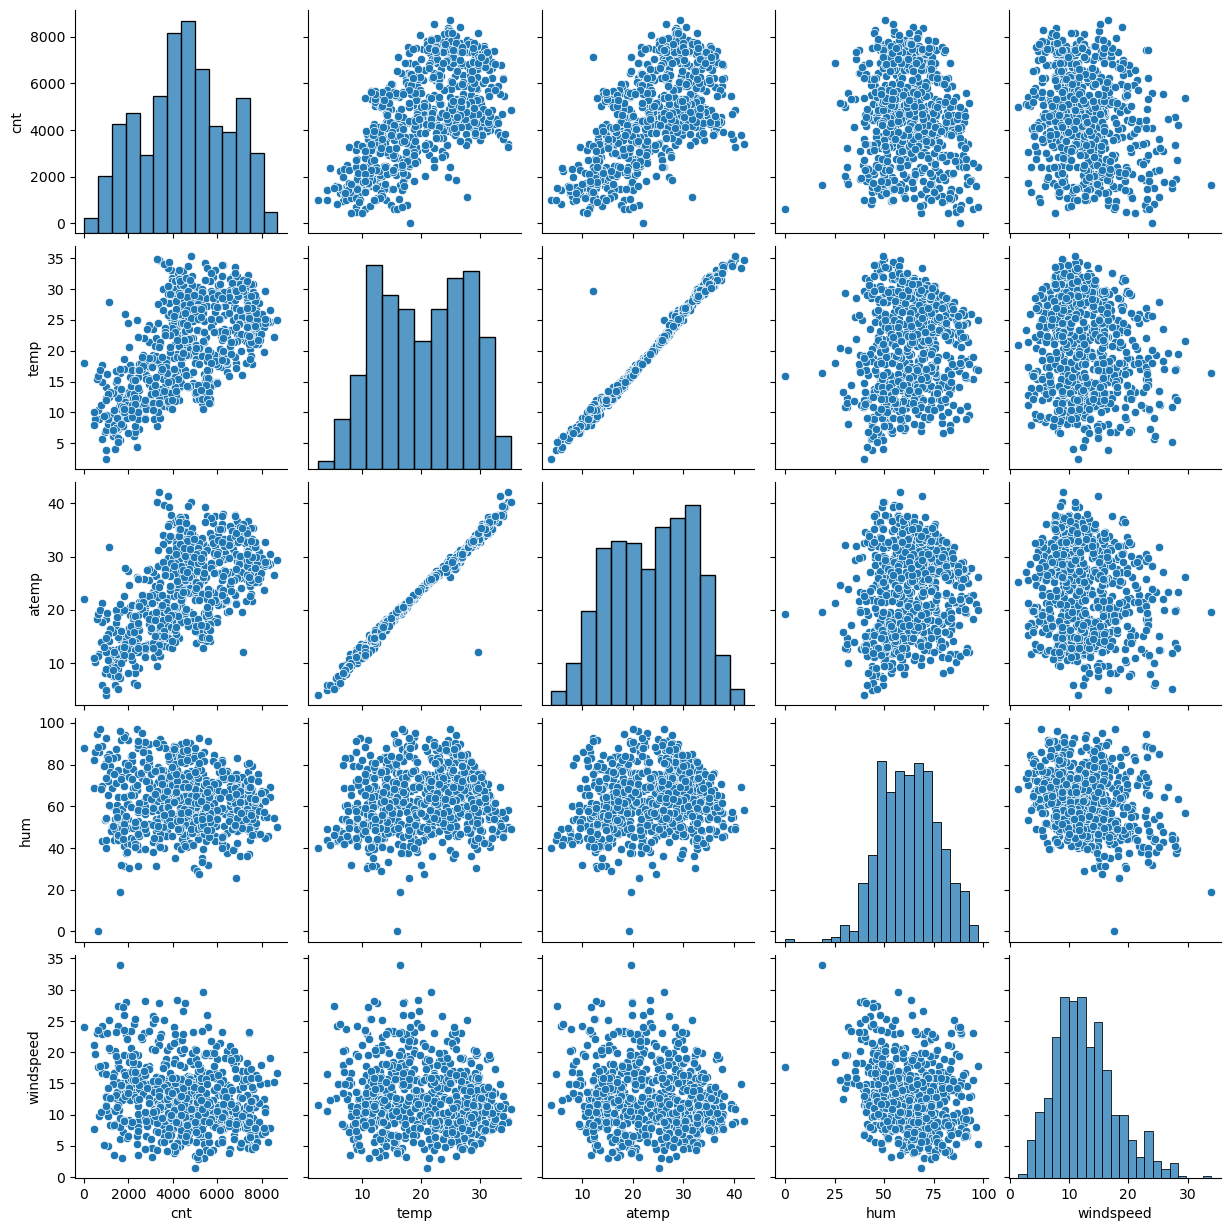

In [23]:
sns.pairplot(data=bike_df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

##### Observation : In scatter plots, 'atemp' and 'temp' do have a linear relationship with the target 'cnt'. This means that the regression model of 'cnt' is linearly valid for prediction.

## Visualising Categorical Variables : Using a boxplot


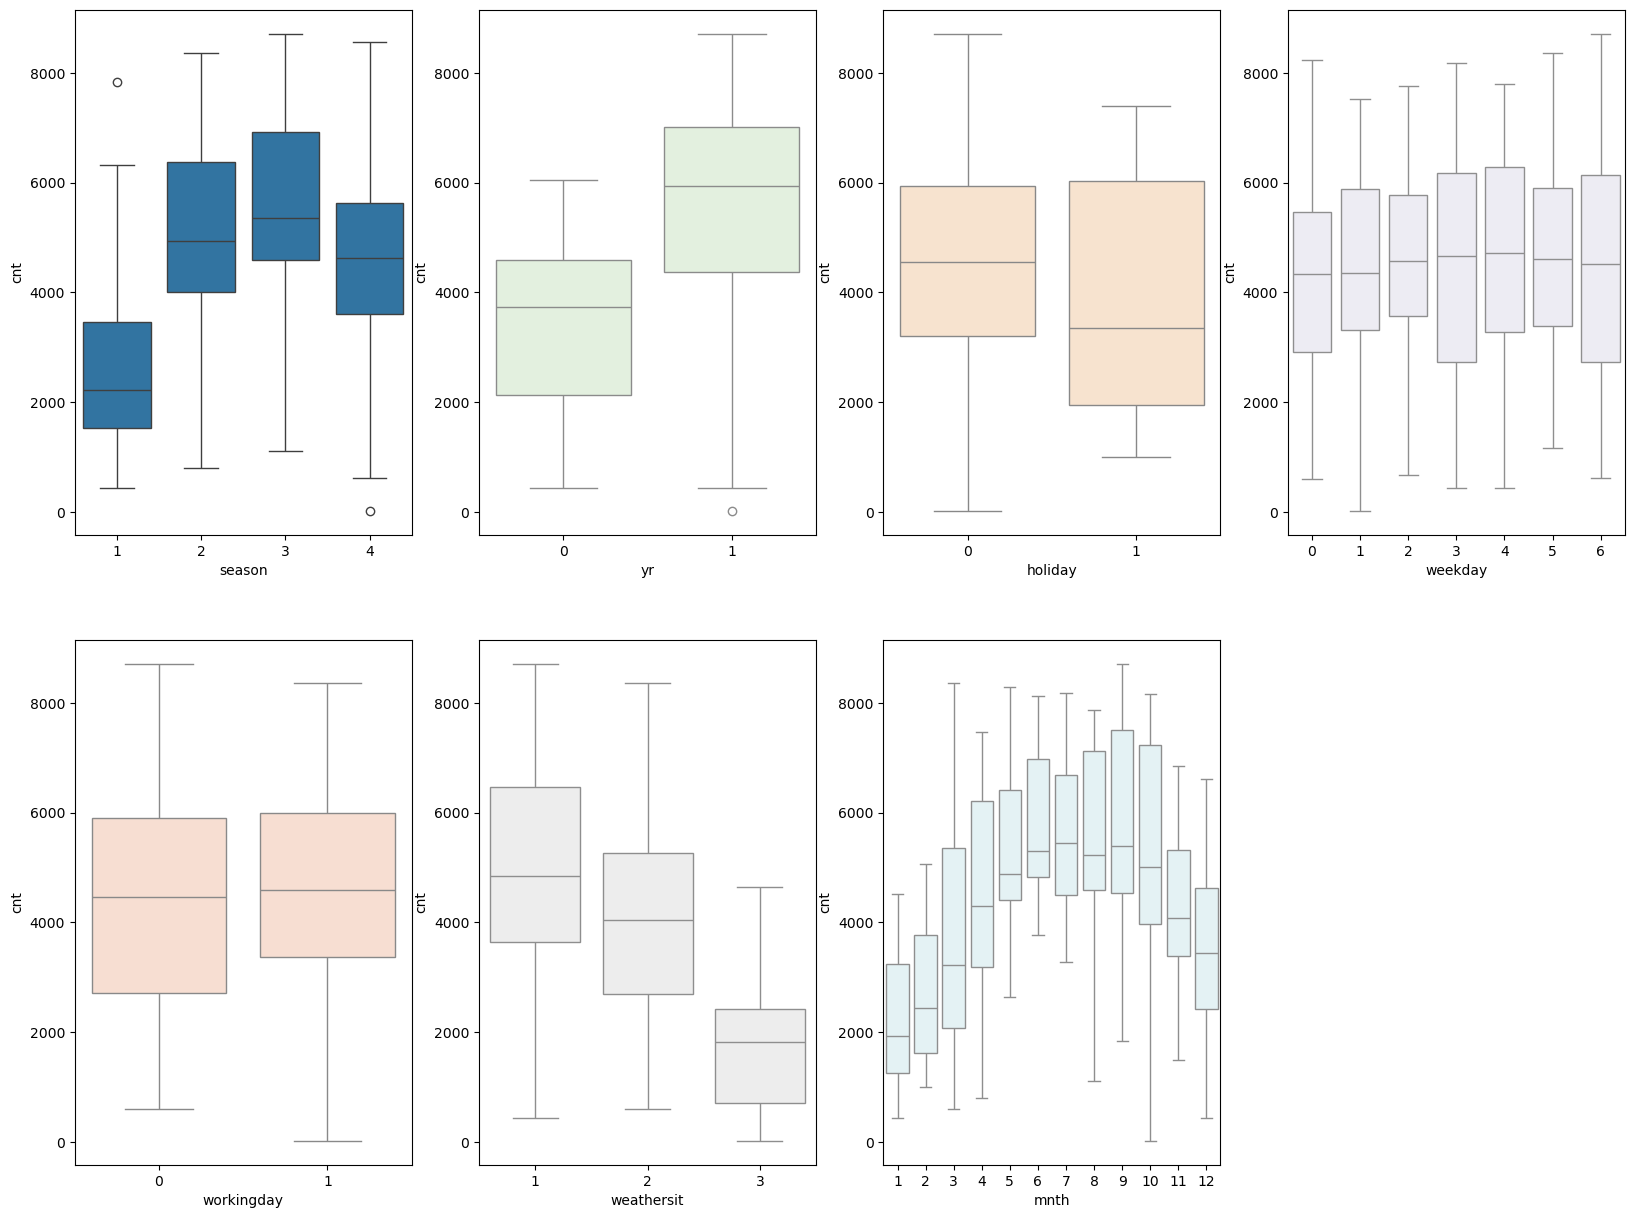

In [26]:
# Define the color palette for each subplot
palettes = [
    "Blues", "Greens", "Oranges", "Purples",
    "Reds", "Greys", "BuGn", "YlOrBr"
]

plt.figure(figsize=(20, 15))

# List of variables to plot
variables = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']

for i, var in enumerate(variables, 1):
    plt.subplot(2, 4, i)
    sns.set_palette(sns.color_palette(palettes[i % len(palettes)]))
    sns.boxplot(x=var, y='cnt', data=bike_df)
    
plt.show()

##### Observations

- The graph simply depicts the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.
- For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring.
- The count of users for the year 2019 is relatively higher as compared to that of the year 2018.
- Count of rentals remains almost at an equal scale throughout the week.
- Users are not there on the heavy rain/snow indicating the fact that such weather condition is relatively harsh. On the highest count, such weather situations were found as Clear, Partly Cloudy.
- The rentals were the highest in September, but in December. This also accounts for the observations found in the weather. The fact that it usually snows so heavily in December can lower the rentals.
- There were fewer users during the holiday.
- From the "Workingday" boxplot we could see those maximum bookings between 4000 and 6000. That is mean the count of users  is constant through out the week. There not much of difference in terms of booking whether its a working day or not.

# Step 3: Data Preparation

#### Mapping the categorical values to their respective categorical string values (reference data dictionary)

In [30]:
bike_df['mnth'] = bike_df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [31]:
# Maping seasons
bike_df.season = bike_df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# Mapping weathersit
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
#Mapping Weekday
bike_df.weekday = bike_df.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [32]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Creating Dummy Variables

Variables mnth, weekday, season, weathersit have levels for example weathersit have 3 levels similarly to variable mnth have levels are 12.
We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.

In [34]:
# Convert boolean columns to integers first
bool_columns = bike_df.select_dtypes(include='bool').columns
bike_df[bool_columns] = bike_df[bool_columns].astype(int)

# Then create dummy variables for categorical columns
bike_df = pd.get_dummies(bike_df, drop_first=True)

# Convert boolean columns to integers first
bool_columns = bike_df.select_dtypes(include='bool').columns
bike_df[bool_columns] = bike_df[bool_columns].astype(int)

# Display the first few rows to verify changes
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
#checking data frame after dummy variables 
bike_df.shape

(730, 30)

In [36]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            730 non-null    int64  
 1   holiday                       730 non-null    int64  
 2   workingday                    730 non-null    int64  
 3   temp                          730 non-null    float64
 4   atemp                         730 non-null    float64
 5   hum                           730 non-null    float64
 6   windspeed                     730 non-null    float64
 7   cnt                           730 non-null    int64  
 8   season_Spring                 730 non-null    int64  
 9   season_Summer                 730 non-null    int64  
 10  season_Winter                 730 non-null    int64  
 11  mnth_Aug                      730 non-null    int64  
 12  mnth_Dec                      730 non-null    int64  
 13  mnth_

# Step 4: Splitting the Data into Training and Testing Sets
#### The first basic step for regression is performing a train-test split.

In [38]:
train, test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


# Step 5: Rescaling the Features


In [40]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [41]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking the coefficients to see which variables are highly correlated


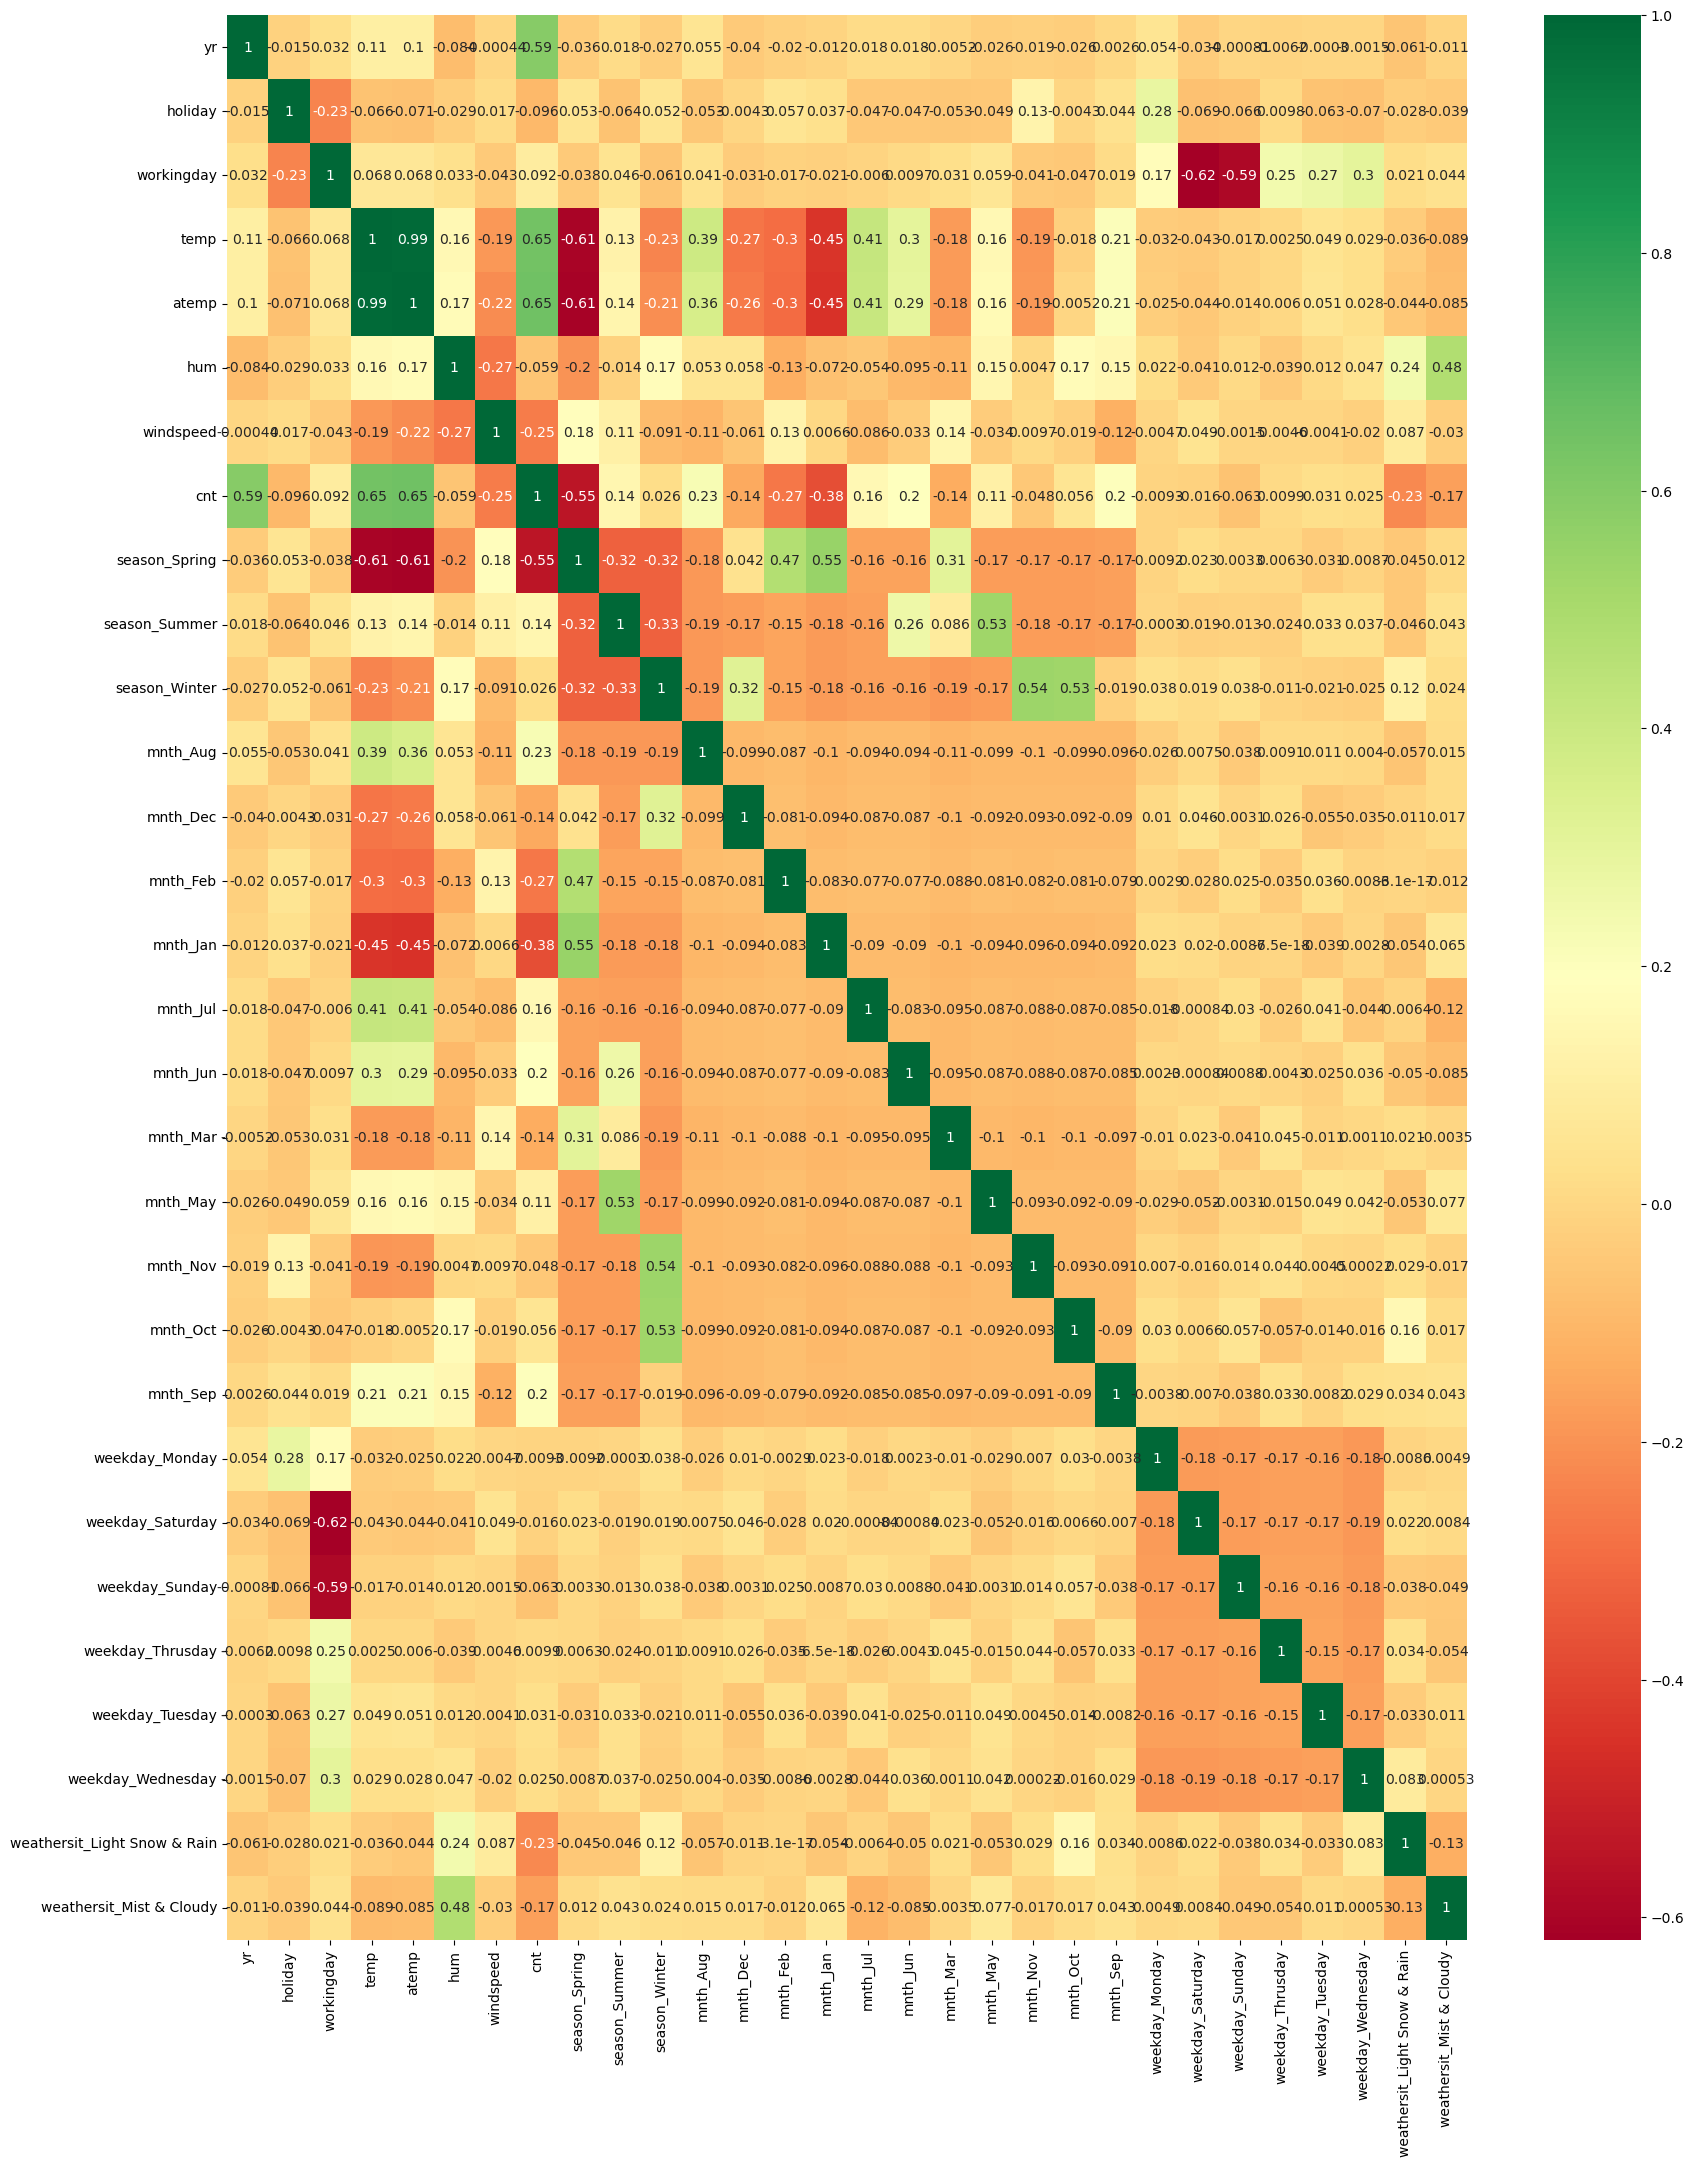

In [43]:
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="RdYlGn")
plt.show()

##### From the heatmap, we can see that the variables atemp and temp clearly have correlation with the target variable cnt; we continue building our model with all columns as it is.

In [45]:
# Dividing into X and Y sets for the model building
y_train = train.pop('cnt')
X_train = train
y_train.shape
(510,)

(510,)

# Step 6: Building Model
##### APPROACH USED :

We would be taking a mixed approach while building the model.
We will use RFE approach for feature selection, and then we will construct the model by using statsmodel

### Feature Selection
We start with 15 variables.
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [48]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 14),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel for the detailed statistics

In [52]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

### Adding a constant variable¶
For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [54]:
X_train_lm = sm.add_constant(X_train_rfe)
X_train_lm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Jul,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


### Building the first linear models using statsmodels

In [56]:
lm_1 = sm.OLS(y_train, X_train_lm).fit()

lm_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.11e-191
Time:                        11:47:41   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1995      0.028      7.200      0.000       0.145       0.254
yr                               0.2298      0.008     28.647      0.000       0.214       0.246
holiday                         -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday                       0.0837      0.010      8.665      0.000       0.065       0.103
temp                             0.5277      0.033     15.884      0.000       0.462       0.593
hum                             -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                       -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_Spring                   -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_Summer                    0.0537      0.015      3.631      0.000       0.025       0.083
season_Winter                    0.0992      0.017      5.815      0.000       0.066       0.133
mnth_Jul                        -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                         0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Saturday                 0.0937      0.012      8.040      0.000       0.071       0.117
weekday_Sunday                   0.0406      0.012      3.315      0.001       0.017       0.065
weathersit_Light Snow & Rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Mist & Cloudy        -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.54e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
# lm = LinearRegression()
# lm.fit(X_train, y_train)

# rfe = RFE(lm, n_features_to_select = 15)
# rfe = rfe.fit(X_train, y_train)

In [58]:
df_train,df_test = train_test_split(bike_df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)
(510, 30)
(220, 30)
# As we saw that Data we were unfiform across the all the Features hence Scaling is Required.
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

(510, 30)
(220, 30)


,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.00000,0.000000,1.000000,1.000000,1.0000
holiday,510.0,0.025490,0.157763,0.00000,0.000000,0.000000,0.000000,1.0000
workingday,510.0,0.676471,0.468282,0.00000,0.000000,1.000000,1.000000,1.0000
temp,510.0,0.537440,0.225858,0.00000,0.339853,0.542596,0.735215,1.0000
atemp,510.0,23.500287,8.090963,3.95348,16.603063,24.131150,30.177700,42.0448
hum,510.0,0.650480,0.145846,0.00000,0.538643,0.653714,0.754830,1.0000
windspeed,510.0,0.320883,0.169803,0.00000,0.199179,0.296763,0.414447,1.0000
cnt,510.0,0.513499,0.224421,0.00000,0.356420,0.518638,0.684710,1.0000
season_Spring,510.0,0.243137,0.429398,0.00000,0.000000,0.000000,0.000000,1.0000
season_Summer,510.0,0.247059,0.431725,0.00000,0.000000,0.000000,0.000000,1.0000


In [59]:
# Preparation of Training Dataset
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(510, 29)


543    0.788886
301    0.069604
113    0.479636
580    0.782559
232    0.443051
Name: cnt, dtype: float64

### Feature Selection using RFE(Recursive Feature Elimination)

In [61]:
# Instantiate the model
lm = LinearRegression()

# Fit the model to the data
lm.fit(X_train, y_train)

# Instantiate RFE with the model and the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE to the data
rfe = rfe.fit(X_train, y_train)

# Get the ranking of features
print(rfe.ranking_)

[ 1  1  1  1 15  1  1  1  1  1  7  4  5  2  1 13 14  6  3  8  1  9  1  1
 11 10 12  1  1]


In [62]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 8),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thrusday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

##### Observation : 
Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and check VIF.

### Checking VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [65]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,workingday,50.68
11,weekday_Saturday,12.20
12,weekday_Sunday,11.79
6,season_Spring,5.02
3,temp,3.62
8,season_Winter,3.49
1,holiday,2.91
7,season_Summer,2.62
4,hum,1.91
14,weathersit_Mist & Cloudy,1.57


##### In general we want VIF to be less than 5. We will drop feature workingday which has highest VIF of 50.68

In [67]:
# dropping workingday since its vif > 5

X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

### Model 2 

In [69]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.11e-191
Time:                        11:47:41   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2832      0.034      8.300      0.000       0.216       0.350
yr                               0.2298      0.008     28.647      0.000       0.214       0.246
holiday                         -0.1021      0.025     -4.024      0.000      -0.152      -0.052
temp                             0.5277      0.033     15.884      0.000       0.462       0.593
hum                             -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                       -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_Spring                   -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_Summer                    0.0537      0.015      3.631      0.000       0.025       0.083
season_Winter                    0.0992      0.017      5.815      0.000       0.066       0.133
mnth_Jul                        -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                         0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Saturday                 0.0100      0.011      0.897      0.370      -0.012       0.032
weekday_Sunday                  -0.0430      0.012     -3.725      0.000      -0.066      -0.020
weathersit_Light Snow & Rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Mist & Cloudy        -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
3,hum,28.25
2,temp,16.06
4,windspeed,4.68
5,season_Spring,4.03
7,season_Winter,3.36
6,season_Summer,2.79
13,weathersit_Mist & Cloudy,2.30
0,yr,2.08
8,mnth_Jul,1.59
9,mnth_Sep,1.39


In [71]:
# dropping hum since its vif > 5
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

### Model 3 

In [73]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.28e-188
Time:                        11:47:41   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2037      0.029      6.972      0.000       0.146       0.261
yr                               0.2337      0.008     28.828      0.000       0.218       0.250
holiday                         -0.1029      0.026     -3.983      0.000      -0.154      -0.052
temp                             0.4915      0.033     15.027      0.000       0.427       0.556
windspeed                       -0.1491      0.025     -6.024      0.000      -0.198      -0.100
season_Spring                   -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_Summer                    0.0477      0.015      3.180      0.002       0.018       0.077
season_Winter                    0.0846      0.017      4.971      0.000       0.051       0.118
mnth_Jul                        -0.0496      0.018     -2.702      0.007      -0.086      -0.014
mnth_Sep                         0.0759      0.017      4.537      0.000       0.043       0.109
weekday_Saturday                 0.0118      0.011      1.037      0.300      -0.011       0.034
weekday_Sunday                  -0.0461      0.012     -3.931      0.000      -0.069      -0.023
weathersit_Light Snow & Rain    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
weathersit_Mist & Cloudy        -0.0822      0.009     -9.514      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,temp,5.18
3,windspeed,4.63
5,season_Summer,2.24
4,season_Spring,2.13
0,yr,2.07
6,season_Winter,1.84
7,mnth_Jul,1.59
12,weathersit_Mist & Cloudy,1.56
8,mnth_Sep,1.34
9,weekday_Saturday,1.23


##### Observation : Now as you can see, the VIFs and p-values both are within an acceptable range. Hence, we finalise lm_3 as the final model to proceed with the future prdeictions.

# Step 7: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [77]:
y_train_pred = lm_3.predict(X_train_lm)


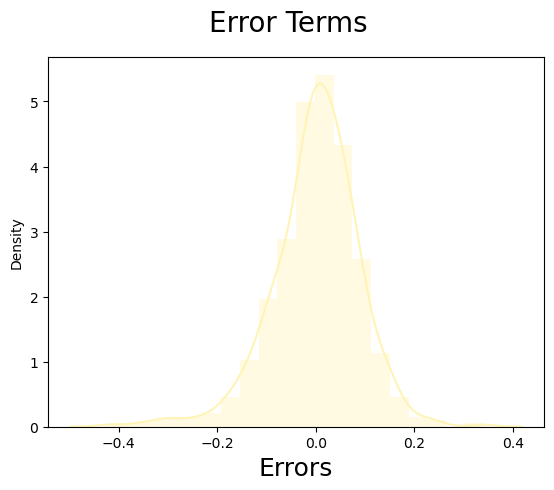

In [78]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

##### We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

##### Cross-verifying the above conclusion using a qq-plot as well:


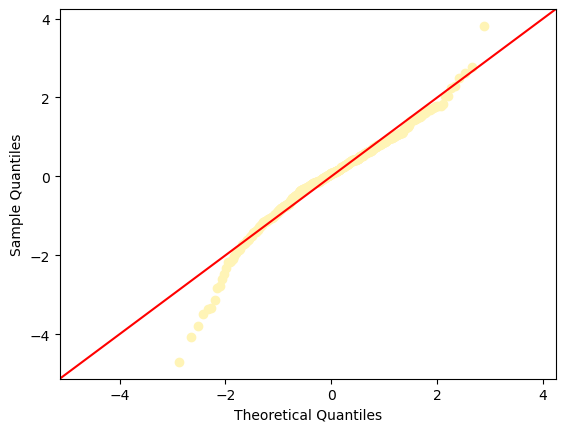

In [81]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

##### Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

# Step 8: Making Predictions Using the Final Model


##### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

#### Applying the scaling on the test sets

In [86]:
test[num_vars] = scaler.transform(test[num_vars])

test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,24.250312,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,8.281075,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,4.941955,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,17.090025,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,24.700000,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,31.124313,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,41.318550,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [88]:
y_test = test.pop('cnt')
X_test = test

In [89]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_3.predict(X_test)

### Calculating the r-squared¶
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [91]:
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.841247655566198
r2_score of test dataset 0.8081836108549543


##### Observation : We can see that the r_squared on the test set is 0.808 and the r-squared on the trained set 0.841 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.


# Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

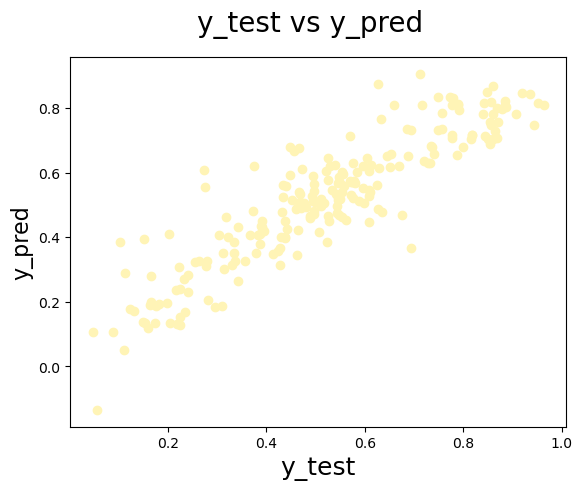

In [94]:
#Plotting the graph for actual versus predicted values.

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

##### Observation : We can colude that the final model fit isn't by chance, and has descent predictive power.

#### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [97]:
param = pd.DataFrame(lm_3.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,14))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.491531
1,yr,0.233727
0,const,0.203679
7,season_Winter,0.084588
9,mnth_Sep,0.075934
6,season_Summer,0.047677
10,weekday_Saturday,0.011757
11,weekday_Sunday,-0.046120
8,mnth_Jul,-0.049633


# Final Observations :
### Best fitting equation for our model.
y = 0.203679 + 0.491531 * x1 + 0.233727 * x2 + 0.084588 * x3 + 0.075934 * x4 + 0.047677 * x5 + 0.011757 * x6 - 0.046120 * x7 - 0.049633 * x8 - 0.065505 * x9 - 0.082161 * x10 - 0.102859 * x11 - 0.149066 * x12 - 0.289513 * x13

cnt = 0.203679 + 0.491531 * temp + 0.233727 * yr + 0.084588 * season_Winter + 0.075934 * mnth_Sep + 0.047677 * season_Summer + 0.011757 * weekday_Saturday - 0.046120 * weekday_Sunday - 0.049633 * mnth_Jul - 0.065505 * season_Spring - 0.082161 * weathersit_Mist & Cloudy - 0.102859 * holiday - 0.149066 * windspeed - 0.289513 * weathersit_Light Snow & Rain

### Influence of Interaction Variables:

### Positive Effect:

- Temperature (temp): The higher the temperature, the higher the bike rental.
- Year (yr): The trend for bike rental is positive with every year.
- Season (Winter, Summer, Sep): Bike demand is high in these seasons compared to Spring and July.
- Weekend (Saturday): Bike rentals are a little more on Saturdays compared to weekdays.
  
### Negative Effect:
- Weather Conditions (Mist & Cloudy, Light Snow & Rain): Bad weather conditions decrease the bike demand.
- Day of Week (Sundays): The demand for bikes is relatively lesser on Sundays than on weekdays.
- Wind Speed (windspeed): More wind speed actually lowers the demand for bikes.
- Holidays (holiday): Bike rentals are lesser on holidays.

### Model Performance:
The R-squared value means that the model captures an important percentage of the variance of bike demand. This means that the features chosen do well at predicting bike demand.

### Key Considerations:

- Undoubtedly, the model may bring forth other states or kinds of weather to produce various results.
- The other considerations are public transportation and activities of local events.
- Greater data analysis can be carried out along with calibrations or changes of the model in pursuit of increasing the prediction.

### Actionable Insights
- Weather-Based Strategies: Launch differential pricing or promotions that attract more rentals during the good days.
- Seasonal Marketing : Form marketing strategies targeting specific seasons and months at peak demand.
- Infrastructure: Bike lanes and bike parking facilities are to be encouraged for biking.
- Data-driven decision making: To know the behavior of a user, the data is to be analyzed, so as to operate the bikes.
  
These results will make a bike sharing company increase the customer satisfaction and business.